saved accuracy is 97.02%
Coefficient:
 [ 0.14353656  1.00050561 -0.20913179  0.35477697  0.06646542  0.04891328
  0.14237133 -0.15954311 -0.18570626  0.04616976]
Intercept:
 -0.2584172954886803
Predicted: 14.74, Features: [14 15 17  4  3  2  1  2  0  0], Actual: 15
Predicted: 6.22, Features: [ 7  7 15  4  4  4  1  2  1  2], Actual: 7
Predicted: 14.66, Features: [15 15 17  4  2  2  1  3  0  0], Actual: 15
Predicted: 10.11, Features: [10 11 16  2  4  4  1  2  0  6], Actual: 11
Predicted: 8.99, Features: [ 8 10 16  3  1  3  1  1  0  4], Actual: 10
Predicted: 5.87, Features: [ 7  7 17  3  3  3  2  1  0  3], Actual: 8
Predicted: 11.01, Features: [ 9  9 17  5  3  3  1  2  0 56], Actual: 8
Predicted: 15.04, Features: [13 15 16  4  3  2  2  2  0  2], Actual: 16
Predicted: 11.81, Features: [12 12 17  2  5  5  2  2  0 14], Actual: 12
Predicted: 14.29, Features: [12 14 16  5  4  3  1  1  0  0], Actual: 15
Predicted: 15.19, Features: [14 15 17  4  3  5  1  1  0  3], Actual: 16
Predicted: 14.99, Fe

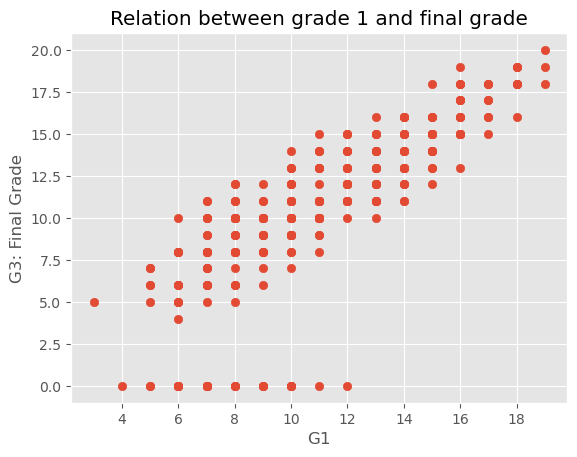

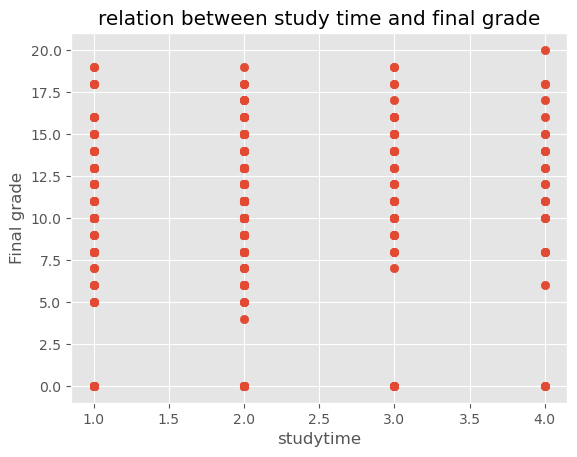

In [216]:
import sklearn.model_selection
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

# Load dataset
data = pd.read_csv("student-mat.csv", sep=";")

# Select relevant features
data = data[["G1", "G2", "G3", "age", "famrel", "freetime", "goout", "traveltime", "studytime", "failures", "absences"]]

# Define target variable
predict = "G3"

# Split features and labels
x = data.drop(columns=["G3"])  # Dropping the "G3" column
y = data["G3"]  # Keeping only the "G3" column as target

# Split into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

#since we split the dataset in training and test sets, this is done randomly each time and leads to a different 
#accuracy every time the model is trained and tested
    
# # Train the model
# linear = linear_model.LinearRegression()
# linear.fit(x_train, y_train)

# # Calculate accuracy
# acc = linear.score(x_test, y_test)

'''
bestacc=0
for _ in range(50000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    linear = linear_model.LinearRegression()
    
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    if acc>bestacc:
        bestacc=acc
        # Save the model
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)
print("accuracy: ", bestacc)

'''

print("saved accuracy is 97.02%")

      
# Now read the saved model (outside the writing block)
with open("studentmodel.pickle", "rb") as pickle_in:
    linear = pickle.load(pickle_in)

# Print model parameters
# y = mx + c where coeffecient is slope m and intercept is c, known as parameters
print("Coefficient:\n", linear.coef_)
print("Intercept:\n", linear.intercept_)

# Make predictions
predictions = linear.predict(x_test)

# Display results
for i in range(len(predictions)):
    print(f"Predicted: {predictions[i]:.2f}, Features: {x_test.iloc[i].to_numpy()}, Actual: {y_test.iloc[i]}")


style.use("ggplot")

p='G1'
plt.scatter(data[p],data["G3"])
plt.xlabel(p)
plt.ylabel("G3: Final Grade")
plt.title("Relation between grade 1 and final grade")
plt.show()

q='studytime'
plt.scatter(data[q], data["G3"])
plt.xlabel(q)
plt.ylabel("Final grade")
plt.title("relation between study time and final grade")
plt.show()